In [1]:
import numpy as np
import deepxde as dde
import matplotlib.pyplot as plt

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term
Enable just-in-time compilation with XLA.




In [2]:
theta = np.linspace(0, 361)* np.pi / 180

In [3]:
theta

array([0.        , 0.12858446, 0.25716892, 0.38575338, 0.51433784,
       0.64292231, 0.77150677, 0.90009123, 1.02867569, 1.15726015,
       1.28584461, 1.41442907, 1.54301353, 1.671598  , 1.80018246,
       1.92876692, 2.05735138, 2.18593584, 2.3145203 , 2.44310476,
       2.57168922, 2.70027369, 2.82885815, 2.95744261, 3.08602707,
       3.21461153, 3.34319599, 3.47178045, 3.60036491, 3.72894938,
       3.85753384, 3.9861183 , 4.11470276, 4.24328722, 4.37187168,
       4.50045614, 4.6290406 , 4.75762507, 4.88620953, 5.01479399,
       5.14337845, 5.27196291, 5.40054737, 5.52913183, 5.65771629,
       5.78630075, 5.91488522, 6.04346968, 6.17205414, 6.3006386 ])

# Shue et al.[1997]

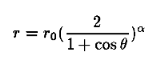

## for alpha = 0.7, r0 = 10

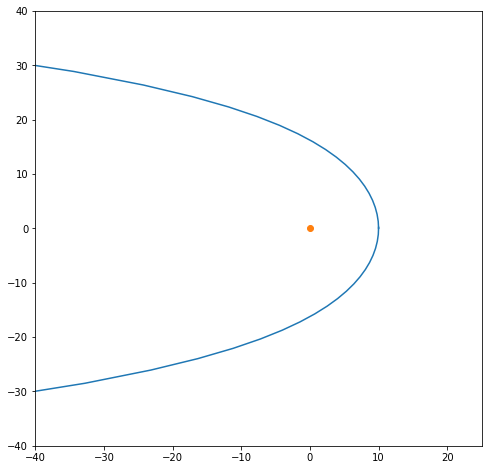

In [5]:
r0 = 10
alpha = 0.7
r = r0*(2/(1+np.cos(theta)))**alpha
plt.figure(figsize=(8, 8))
plt.plot(r*np.cos(theta), r*np.sin(theta))
plt.xlim(-40, 25)
plt.ylim(-40, 40)
plt.plot(0, 0, 'o')
plt.show()

#  Convert to Cartesian coordinate

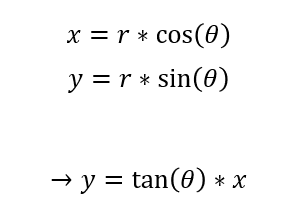

<Figure size 432x288 with 0 Axes>

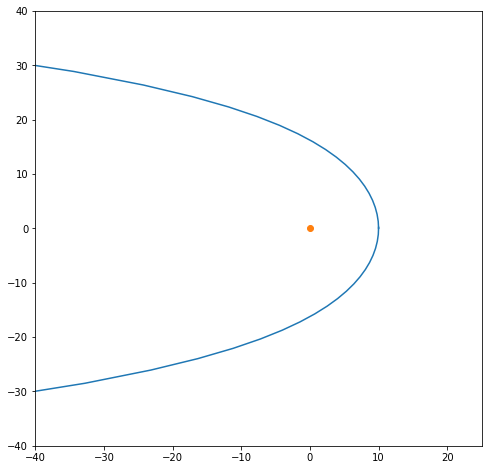

In [6]:
plt.clf()
plt.figure(figsize=(8, 8))
x = r*np.cos(theta)
y = x * np.tan(theta)
plt.xlim(-40, 25)
plt.ylim(-40, 40)
plt.plot(x,y)
plt.plot(0, 0, 'o')
plt.show()

# Hands on Deepxde to derive Shue et al.[1997]

In [12]:
def func(x):
    return 10 * (2/(1+np.cos(x*np.pi/180)))**0.4

In [13]:
geom = dde.geometry.Interval(-100, 100)
num_train = 50
num_test = 40

data = dde.data.Function(geom, func, num_train, num_test)

In [14]:
layers = [1] + [30]*3 +[15]*2 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layers, activation, initializer)

Compiling model...
Building feed-forward neural network...
'build' took 0.119486 s

'compile' took 0.443102 s

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [1.62e+02]    [1.63e+02]    [1.00e+00]    
1000      [6.30e+00]    [6.49e+00]    [2.00e-01]    
2000      [6.30e+00]    [6.48e+00]    [1.99e-01]    
3000      [6.30e+00]    [6.48e+00]    [1.99e-01]    
4000      [4.86e+00]    [5.00e+00]    [1.75e-01]    
5000      [2.76e-02]    [3.38e-02]    [1.44e-02]    
6000      [1.94e-03]    [2.28e-03]    [3.74e-03]    
7000      [3.51e-02]    [3.39e-02]    [1.44e-02]    
8000      [7.46e-04]    [7.03e-04]    [2.08e-03]    
9000      [1.30e-04]    [2.64e-04]    [1.27e-03]    
10000     [8.32e-05]    [1.98e-04]    [1.10e-03]    
11000     [3.07e-02]    [2.97e-02]    [1.35e-02]    
12000     [6.41e-05]    [2.19e-04]    [1.16e-03]    
13000     [7.52e-03]    [7.22e-03]    [6.66e-03]    
14000     [5.16e-05]    [2.09e-04]    [1.13e-03] 

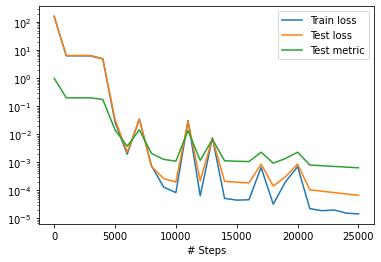

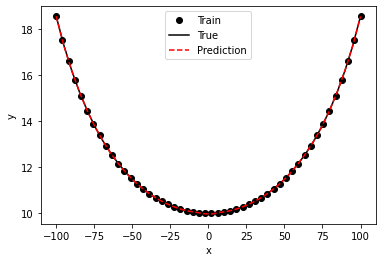

In [15]:
model = dde.Model(data, net)
model.compile("adam", lr = 0.001, metrics = ["l2 relative error"])
losshistory, train_state = model.train(iterations = 25000)

dde.saveplot(losshistory, train_state, issave = True, isplot = True)

AttributeError: 'TrainState' object has no attribute 'shape'